In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import warnings
warnings.filterwarnings('ignore')

# LIBRARY IMPORT
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy.stats import pearsonr
from mpl_toolkits.basemap import Basemap, cm

In [2]:
# Load intensification rate data
int_rate = pd.read_csv('Data/computed-data/computed_annual-intensification-rate_JTWC.csv')
int_rate = int_rate[int_rate['YEAR']>=1955]

# Load intensification duration data
int_dur = pd.read_csv('Data/computed-data/computed_annual-intensification-duration_JTWC.csv')
int_dur = int_dur[int_dur['YEAR']>=1955]

### Duration Correlation

In [3]:
# Define function to find correlation
def find_corr_dur(data):
    return pearsonr(data['t_stratify'].values,int_dur['Intensification Duration'].values)[0]

In [4]:
# Determine whether the cyclone move into the big box
map = Basemap(projection='cyl',resolution='c',llcrnrlon=90,\
        llcrnrlat=-31,urcrnrlon=280,urcrnrlat=65)

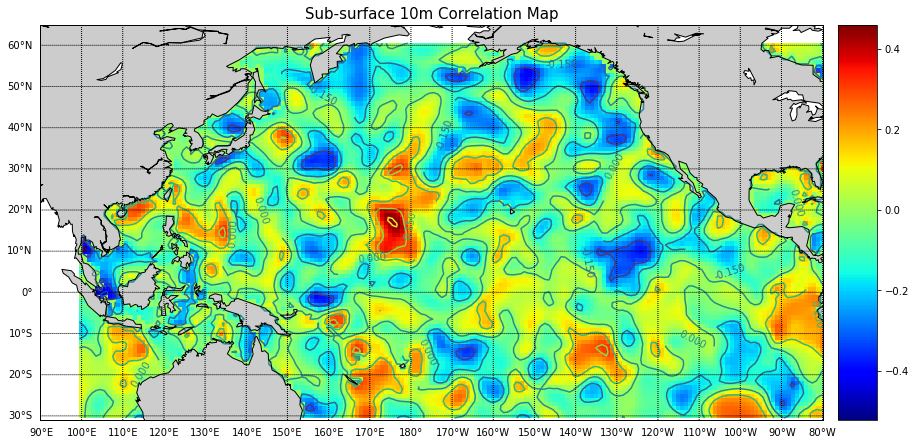

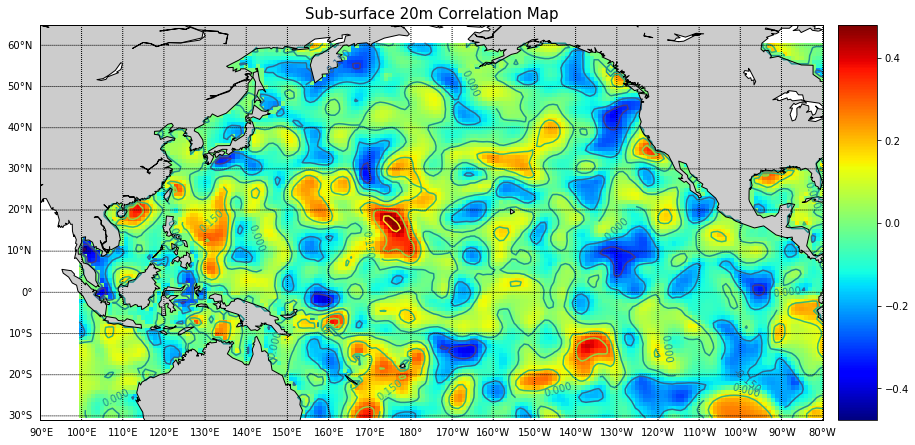

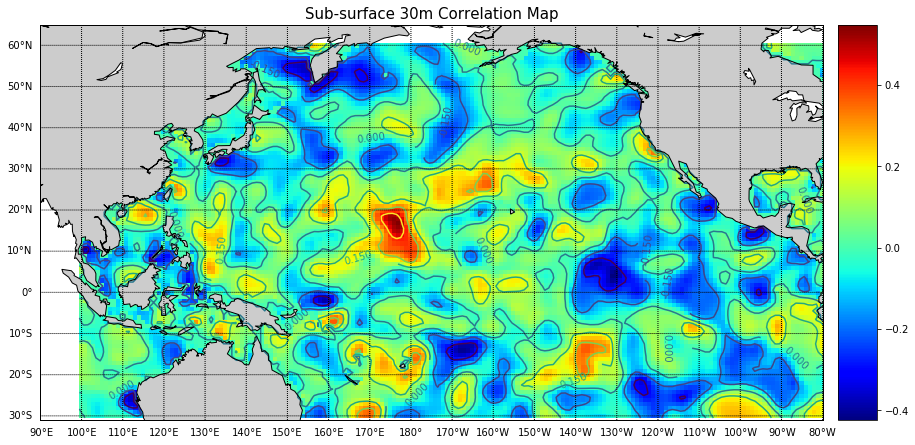

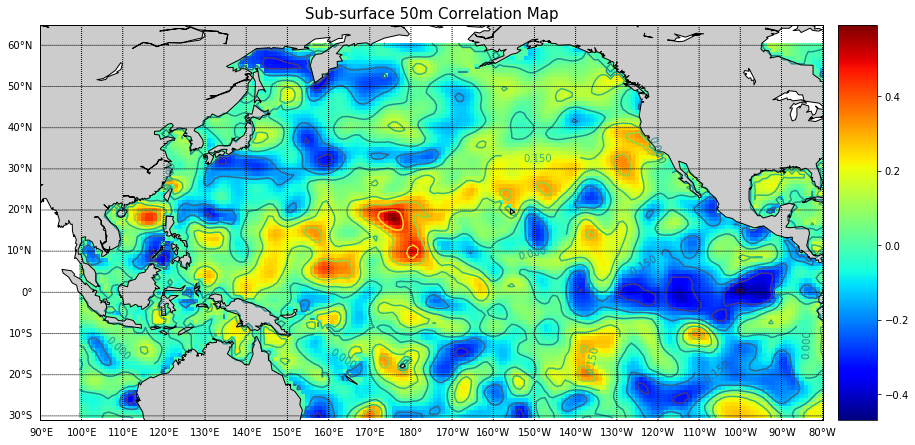

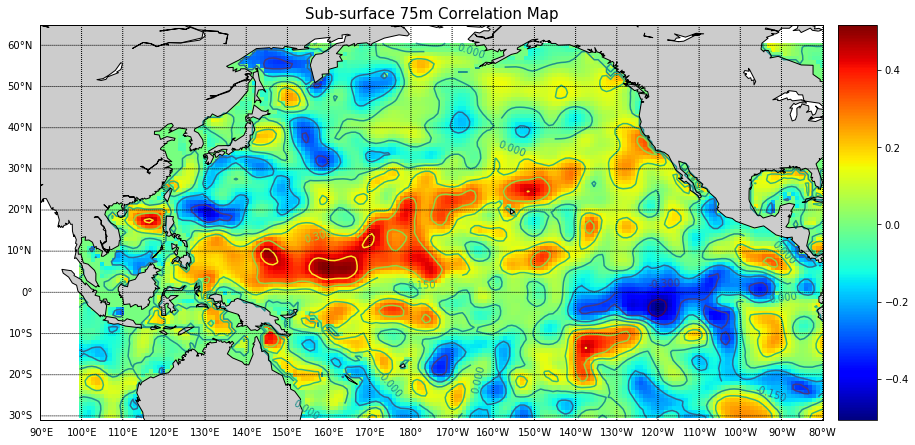

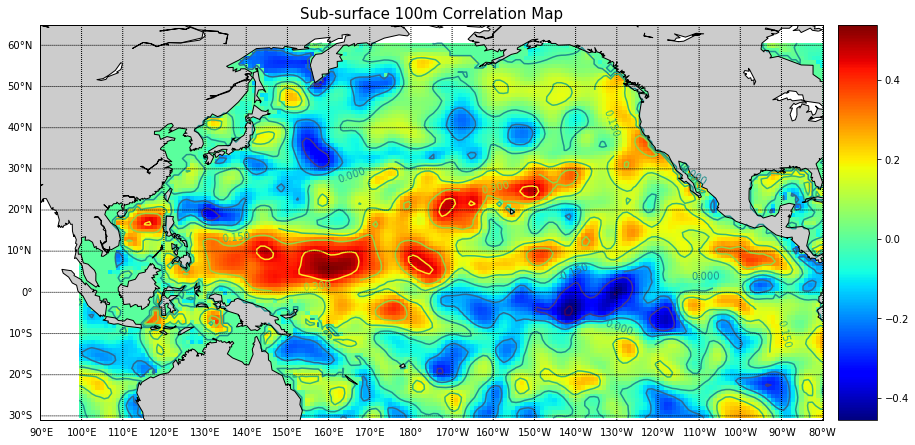

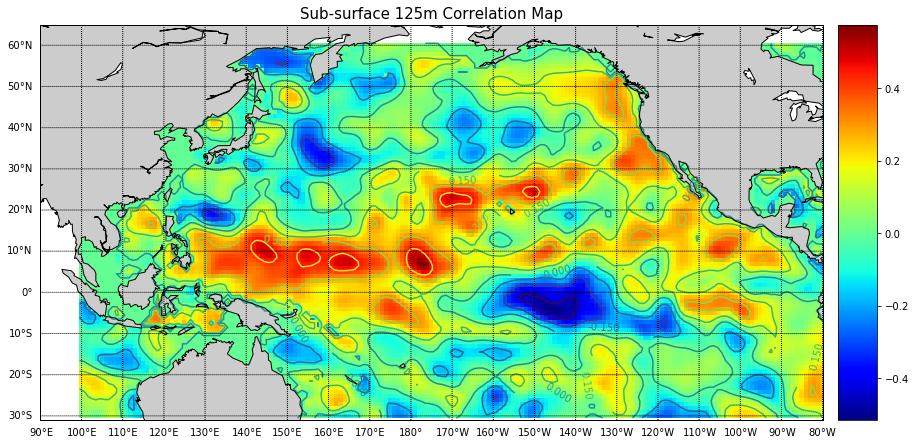

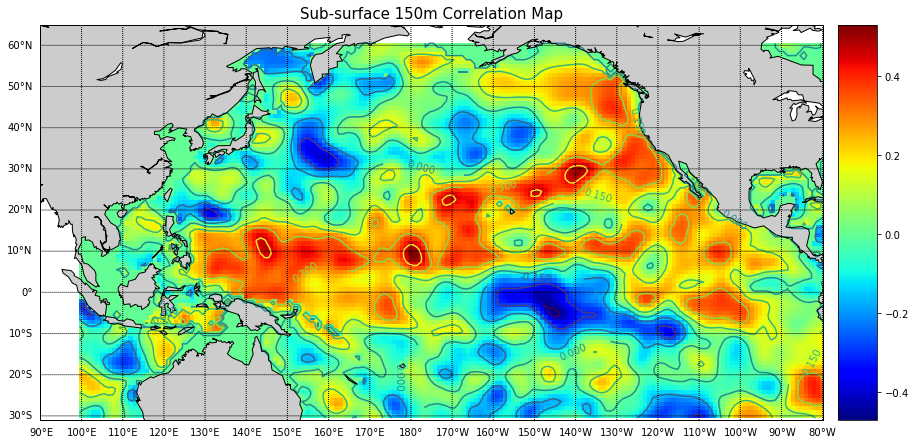

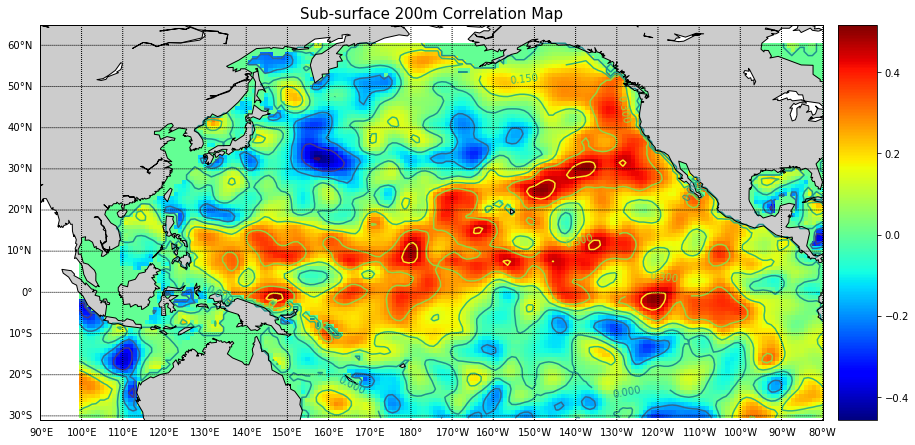

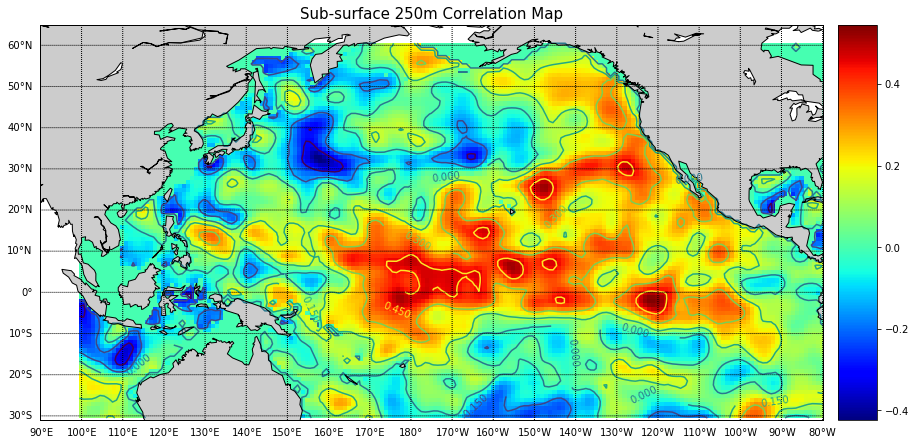

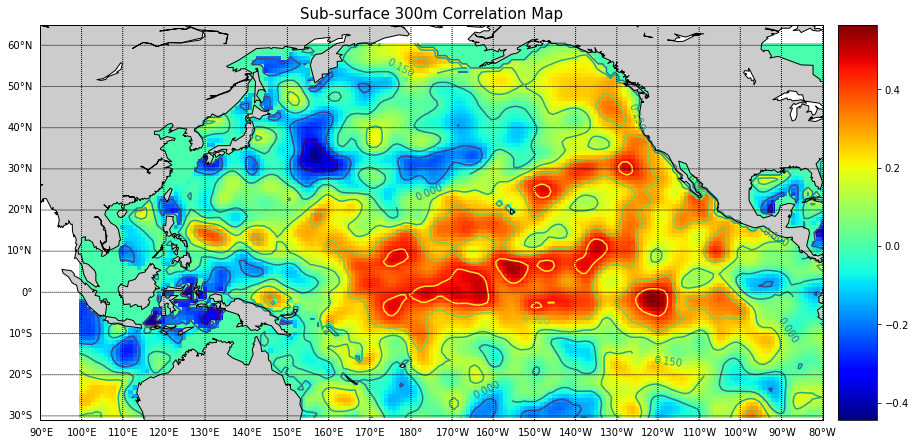

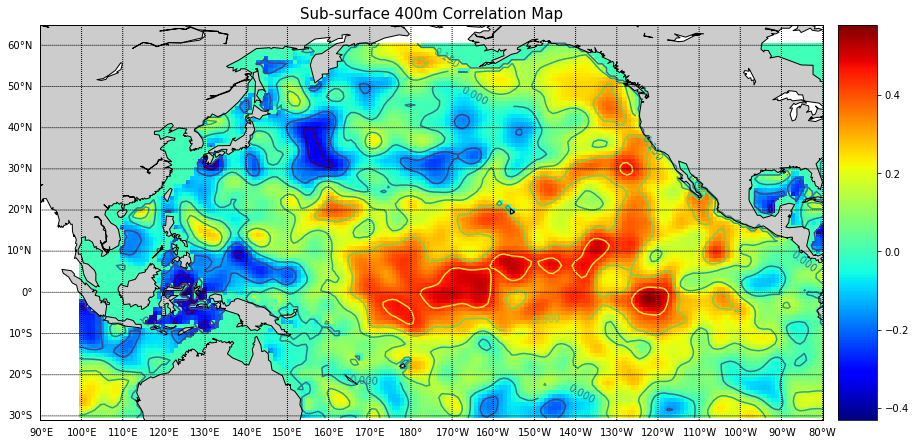

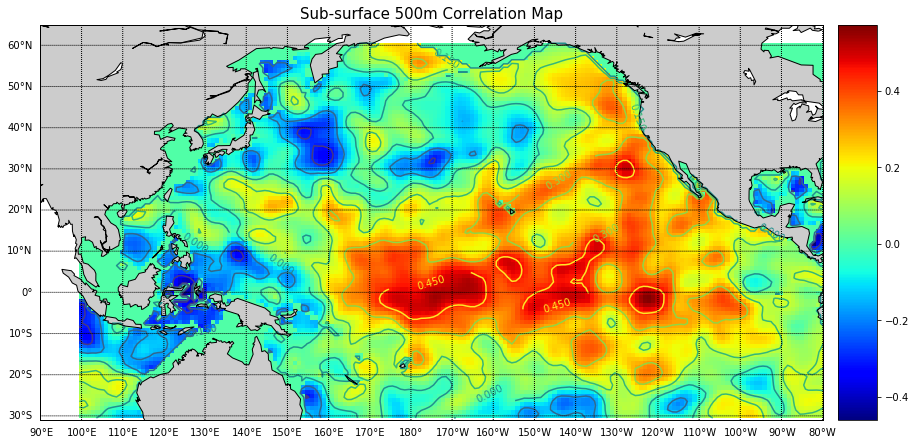

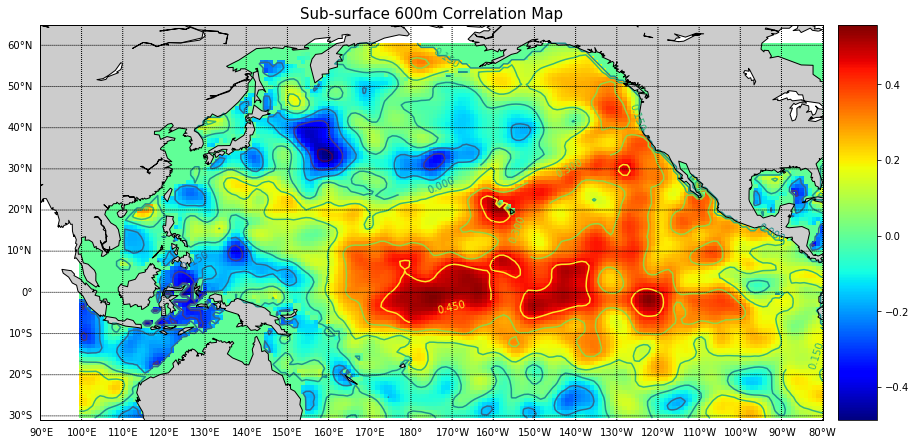

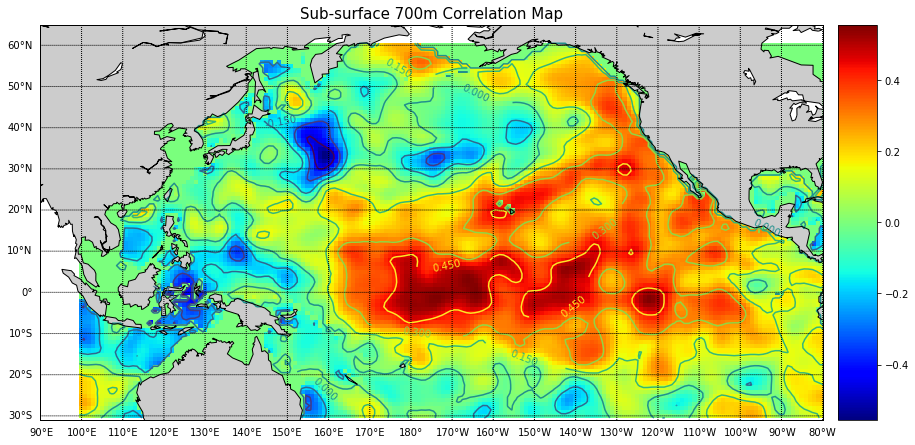

In [6]:
depths = [10,20,30,50,75,100,125,150,200,250,300,400,500,600,700]

# Extract surface temperature
surface = pd.read_csv('Data/sub-surface-temperature/raw-data_0m-sub-temp.csv',
                      parse_dates=['time'])
surface = surface[['lat','lon','t_an','time']].drop_duplicates().dropna()
surface.columns = ['lat','lon','t_surface','time']

# Convert to 360 degree coordinates
surface.loc[surface['lon'] < 0, 'lon'] = 360 + surface['lon']


for depth in depths:
    
    # Load sub surface temperature data
    sub = pd.read_csv('Data/sub-surface-temperature/raw-data_{}m-sub-temp.csv'.format(depth),
                      parse_dates=['time'])
    sub = sub[['lat','lon','t_an','time']].drop_duplicates().dropna()
    sub.columns = ['lat','lon','t_sub','time']
    
    # Convert to 360 degree coordinates
    sub.loc[sub['lon'] < 0, 'lon'] = 360 + sub['lon']
    
    anom = surface.merge(sub, on=['lat','lon','time'])
    anom['t_stratify'] = anom['t_surface'] - anom['t_sub']
                   
    sub_season_corr = anom.groupby(['lat','lon']).apply(find_corr_dur).rename('corr').to_frame()
    sub_season_corr = xr.Dataset.from_dataframe(sub_season_corr)

    sub_season_corr = sub_season_corr.fillna(0)

    data = sub_season_corr.variables['corr'][:]
    lats = sub_season_corr.variables['lat'][:]
    lons = sub_season_corr.variables['lon'][:]

    im1 = map.pcolormesh(lons, lats, data,cmap=plt.cm.jet,latlon=True)
    
    cb = map.colorbar(im1,"right", size="5%", pad="2%")

    
    CS = plt.contour(lons.values, lats.values, data.values)
    plt.clabel(CS, inline=1, fontsize=10)
    
    # make image bigger:
    plt.title('Sub-surface {}m Correlation Map'.format(depth),fontsize=15)
    plt.gcf().set_size_inches(15,15)
    map.drawcoastlines()
    map.drawmapboundary()
    map.fillcontinents()
    map.drawparallels(np.arange(-90.,91.,10.),labels=[True,False,False,True])
    map.drawmeridians(np.arange(-180.,181.,10.),labels=[True,False,False,True])

    plt.show()

In [ ]:
depths = [   0,   10,   20,   30,   50,   75,  100,  125,  150,  200,
        250,  300,  400,  500,  600,  700]

for depth in depths:
    
    # Load sub surface temperature data
    sub = pd.read_csv('Data/sub-surface-temperature/raw-data_{}m-sub-temp.csv'.format(depth),
                      parse_dates=['time'])
    sub = sub[['depth','lat','lon','t_mn','t_an','t_SE','time']]
    sub = sub.drop_duplicates()
    
    # Convert to 360 degree coordinates
    sub.loc[sub['lon'] < 0, 'lon'] = 360 + sub['lon']
    
    sub_season_corr = sub.groupby(['lat','lon']).apply(find_corr_dur).rename('corr').to_frame()
    sub_season_corr = xr.Dataset.from_dataframe(sub_season_corr)

    sub_season_corr = sub_season_corr.fillna(0)

    data = sub_season_corr.variables['corr'][:]
    lats = sub_season_corr.variables['lat'][:]
    lons = sub_season_corr.variables['lon'][:]

    im1 = map.pcolormesh(lons, lats, data,cmap=plt.cm.jet,latlon=True)
    
    cb = map.colorbar(im1,"right", size="5%", pad="2%")

    
    CS = plt.contour(lons.values, lats.values, data.values)
    plt.clabel(CS, inline=1, fontsize=10)
    
    # make image bigger:
    plt.title('Sub-surface {}m Correlation Map'.format(depth),fontsize=15)
    plt.gcf().set_size_inches(15,15)
    map.drawcoastlines()
    map.drawmapboundary()
    map.fillcontinents()
    map.drawparallels(np.arange(-90.,91.,10.),labels=[True,False,False,True])
    map.drawmeridians(np.arange(-180.,181.,10.),labels=[True,False,False,True])

    plt.show()

### Rate Correlation

In [ ]:
# Define function to find correlation
def find_corr_rate(data):
    return pearsonr(data['t_an'].values,int_rate['Intensification Rate'].values)[0]

In [ ]:
for depth in depths:
    
    # Load sub surface temperature data
    sub = pd.read_csv('Data/sub-surface-temperature/raw-data_{}m-sub-temp.csv'.format(depth),
                      parse_dates=['time'])
    sub = sub[['depth','lat','lon','t_mn','t_an','t_SE','time']]
    sub = sub.drop_duplicates()
    
    # Convert to 360 degree coordinates
    sub.loc[sub['lon'] < 0, 'lon'] = 360 + sub['lon']

    sub_season_corr = sub.groupby(['lat','lon']).apply(find_corr_rate).rename('corr').to_frame()
    sub_season_corr = xr.Dataset.from_dataframe(sub_season_corr)

    sub_season_corr = sub_season_corr.fillna(0)

    data = sub_season_corr.variables['corr'][:]
    lats = sub_season_corr.variables['lat'][:]
    lons = sub_season_corr.variables['lon'][:]
    
    im1 = map.pcolormesh(lons, lats, data,cmap=plt.cm.jet,latlon=True)
    
    cb = map.colorbar(im1,"right", size="5%", pad="2%")

    
    CS = plt.contour(lons.values, lats.values, data.values)
    plt.clabel(CS, inline=1, fontsize=10)
    
    # make image bigger:
    plt.title('Sub-surface {}m Correlation Map'.format(depth),
              fontsize=15)
    plt.gcf().set_size_inches(15,15)
    map.drawcoastlines()
    map.drawmapboundary()
    map.fillcontinents()
    map.drawparallels(np.arange(-90.,91.,10.),labels=[True,False,False,True])
    map.drawmeridians(np.arange(-180.,181.,10.),labels=[True,False,False,True])

    plt.show()